In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ching_chang\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Download traffic sign images

Download dataset - [BelgiumTS for Classification (cropped images)](http://btsd.ethz.ch/shareddata/)

* You’ll see that the testing and the training data folders, contain 61 subfolders.
* Each subdirectory represents a label!
* There are 62 types of traffic signs that you’ll use for classification in this tutorial.
* The files have the file extension .ppm (Portable Pixmap Format)

Write a user defined function `load_data` to load in the dataset

In [6]:
from skimage import transform
from skimage import data
from skimage.color import rgb2gray

In [14]:
import os

def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,d))]
    
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        filenames = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        for f in filenames:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

In [15]:
ROOT_PATH ='C:\\Users\\ching_chang\\Documents\\PythonNotebook\\dataset'
TRAIN_DATA_DIR = os.path.join(ROOT_PATH, 'BelgiumTSC\\Training')
TEST_DATA_DIR = os.path.join(ROOT_PATH, 'BelgiumTSC\\Testing')

images, labels = load_data(TRAIN_DATA_DIR)

In [23]:
images_array = np.array(images)
labels_array = np.array(labels)

print("Dimensions: ", images_array.ndim)
print("Number of elements: ", images_array.size)

# Count the number of labels
print("Number of labels", len(set(labels_array)))

Dimensions:  1
Number of elements:  4575
Number of labels 62


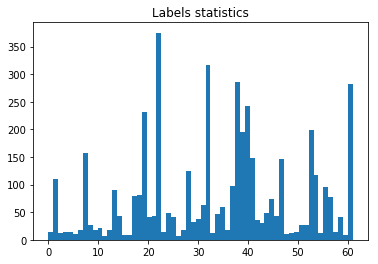

In [21]:
# Make a histogram with 62 bins of the `labels` data
plt.clf()
plt.hist(labels, 62)
plt.title("Labels statistics")
# Show the plot
plt.show()

### Show some example images

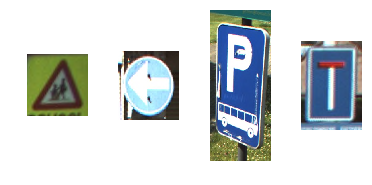

In [22]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

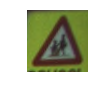

shape: (62, 61, 3), min: 3, max: 160


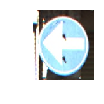

shape: (110, 96, 3), min: 3, max: 255


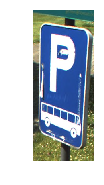

shape: (379, 153, 3), min: 0, max: 255


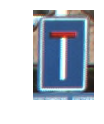

shape: (100, 68, 3), min: 17, max: 255


In [26]:
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

## Display each unique labels

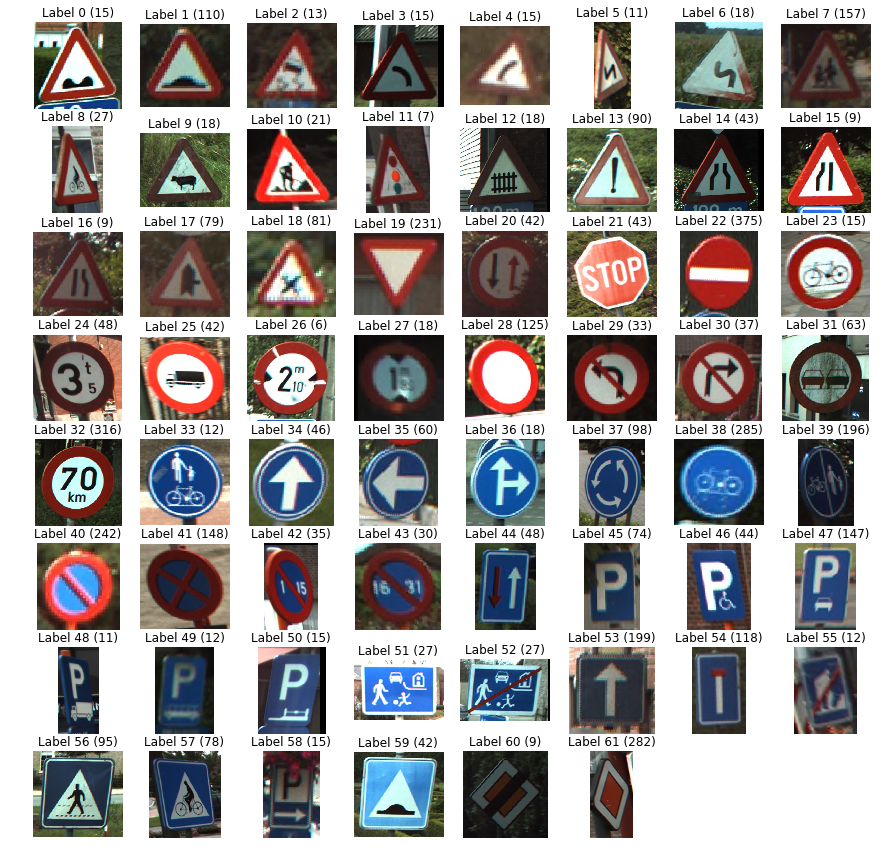

In [28]:
# Get the uniques labels
unique_labels = set(labels)
plt.figure(figsize=(15,15))

counter = 1
for label in unique_labels:
    # Pick the first image for each label
    image = images[labels.index(label)]
    # Plot 64 subplots
    plt.subplot(8,8,counter)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label,labels.count(label)))
    # Add 1 to the counter
    counter += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

### Note: Some labels have considerable counts, ex labels 22(375), 32(316), 38(285), and 61(282)

## Feature Extraction
### Rescaling Images
* The size of the images was unequal
* Total 62 labels (from 0 to 61)
* The distribution of the signs is unequal

In [39]:
# find the min shape
images_width = [image.shape[0] for image in images]
images_height = [image.shape[1] for image in images]

In [44]:
print("Width: min {0} max {1}".format(np.min(images_width), np.max(images_width)))
print("Height: min {0} max {1}".format(np.min(images_height), np.max(images_height)))

Width: min 22 max 724
Height: min 20 max 529


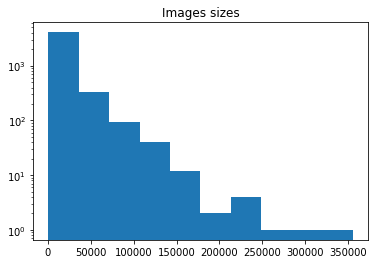

In [53]:
# Make a histogram with 62 bins of the `labels` data
plt.clf()
plt.hist(np.multiply(images_width,images_height),log=True)
plt.title("Images sizes")
# Show the plot
plt.show()

In [54]:
images32 = [transform.resize(image, (32,32)) for image in images]
images32 = np.array(images32)

C:\Users\ching_chang\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Convert to grayscale

In [55]:
images32 = rgb2gray(images32)

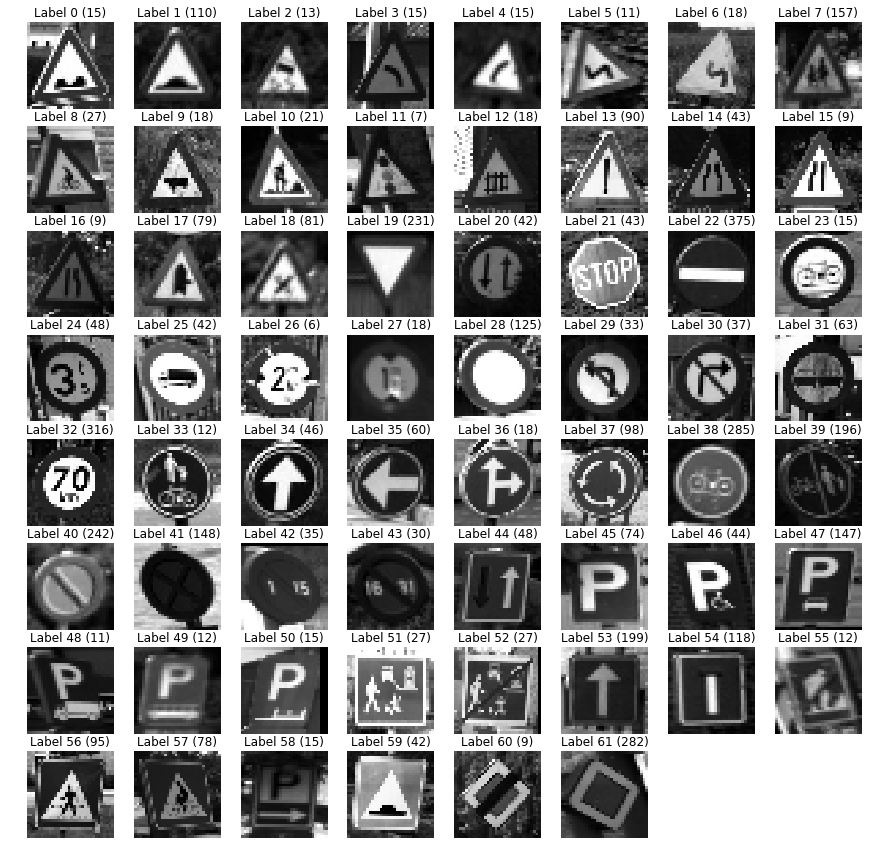

In [56]:
plt.figure(figsize=(15,15))

counter = 1
for label in unique_labels:
    # Pick the first image for each label
    image = images32[labels.index(label)]
    # Plot 64 subplots
    plt.subplot(8,8,counter)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label,labels.count(label)))
    # Add 1 to the counter
    counter += 1
    # And you plot this first image 
    plt.imshow(image, cmap="gray")
    
# Show the plot
plt.show()

## Tensorflow model

In [63]:
test_data, test_labels = load_data(TEST_DATA_DIR)
test_images32 = [transform.resize(image, (32,32)) for image in test_data]
test_images32 = rgb2gray(np.array(test_images32))

TRAINING_SIZE = len(images32)
TESTING_SIZE = len(test_images32)
# Reshape from (m, 32,32) to (m, 1024)
train_images = np.reshape(images32, (TRAINING_SIZE, 1024))
test_images = np.reshape(test_images32, (TESTING_SIZE, 1024))
# the images is type of float64, no need to convert the type

C:\Users\ching_chang\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [65]:
NUM_SIGNS = 62
train_labels = labels
print("Before", train_labels[0])
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_SIGNS)
print ("After", train_labels[0])
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_SIGNS)

Before 0
After [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [66]:
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Activation

K.clear_session()
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(1024,)))
model.add(Dense(62, activation = 'softmax'))

# Compile the model and print the summary
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

tensorboard = TensorBoard(log_dir='./logs/6-traffic-sign')
model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 62)                31806     
Total params: 556,606
Trainable params: 556,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4575/4575 [==============================] - 2s 453us/step - loss: 2.6255 - acc: 0.4079
Epoch 2/5
4575/4575 [==============================] - 1s 320us/step - loss: 1.4399 - acc: 0.6457
Epoch 3/5
4575/4575 [==============================] - 2s 360us/step - loss: 0.9823 - acc: 0.7567
Epoch 4/5
4575/4575 [==============================] - 2s 368us/step - loss: 0.7392 - acc: 0.8017
Epoch 5/5
4575/4575 [==============================] - 2s 339us/step - loss: 0.5878 - acc: 0.8442


In [67]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % (accuracy))

2520/2520 [==============================] - 0s 89us/step
Test accuracy: 0.78


## Show incorrect images

In [84]:
test_real_labels = np.argmax(test_labels,axis=-1)
incorrect_index = [y != y_ for y,y_ in zip (test_real_labels, model.predict_classes(test_images))]

len(incorrect_index)

2520

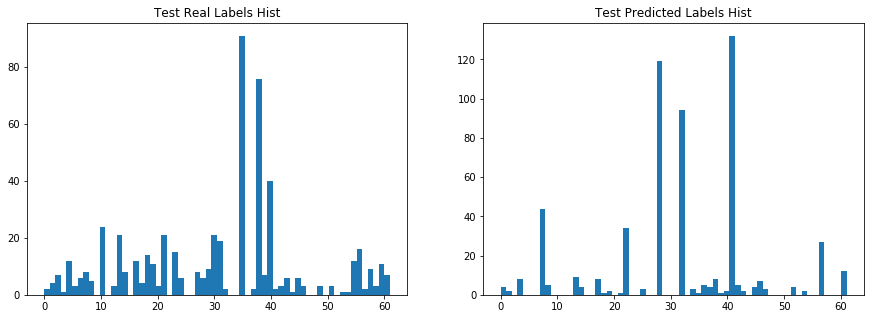

In [98]:
# Make a histogram with 62 bins of the `labels` data
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(test_real_labels[incorrect_index], 62)
axs[0].set_title("Test Real Labels Hist")

axs[1].hist(model.predict_classes(test_images)[incorrect_index], 62)
axs[1].set_title("Test Predicted Labels Hist")
plt.show()

In [108]:
error_labels_hist = np.zeros((62))
for label in test_real_labels[incorrect_index]:
    error_labels_hist[label] += 1
max_error_label = np.argmax(error_labels_hist)
print("The max error labels is ", max_error_label)
print("The max error labels' count is %d" % error_labels_hist[max_error_label])

The max error labels is  35
The max error labels' count is 91


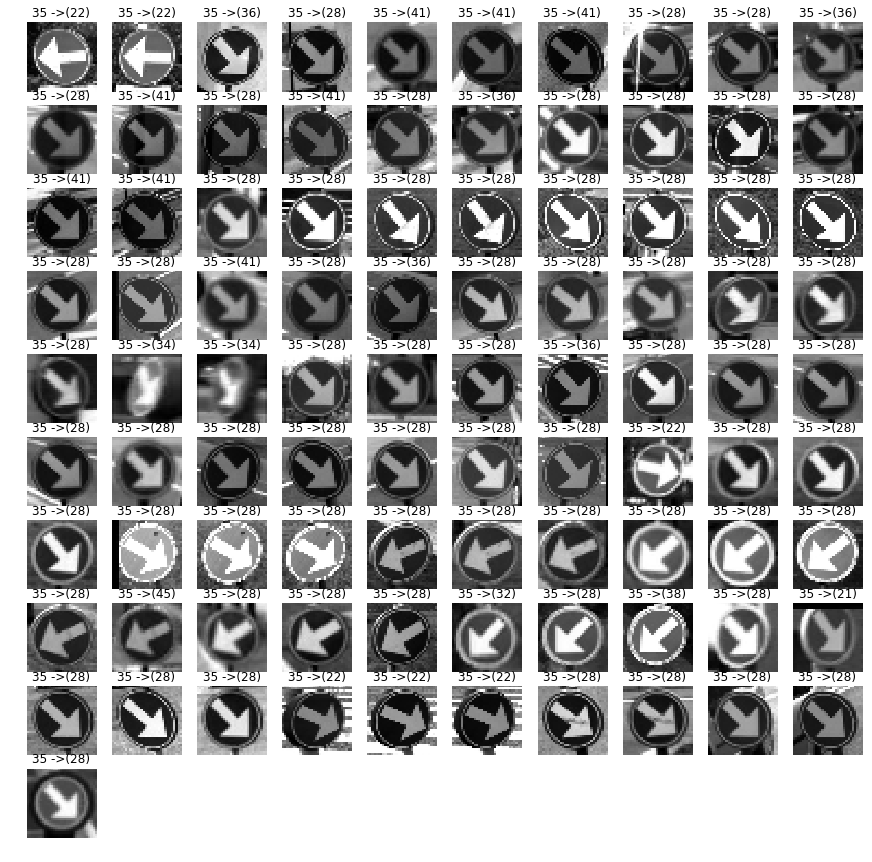

In [110]:
# Plot the biggest error labels images (first 50 images)
plt.figure(figsize=(15,15))
predicted_test_labels = model.predict_classes(test_images)
counter = 1
for i, isError in enumerate(incorrect_index):
    if isError and test_real_labels[i]== max_error_label:
        image = test_images32[i]
        plt.subplot(10,10,counter)
        plt.axis('off')
        plt.title("{0} ->({1})".format(max_error_label, predicted_test_labels[i]))
        plt.imshow(image, cmap="gray")
        # Add 1 to the counter
        counter += 1
    
# Show the plot
plt.show()

## ConvNet 

In [133]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt

In [140]:
def SignModel(input_shape, classes):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(32, (7,7), strides=(1,1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu', name='relu0')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='dense')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='TrafficSignModel')
    
    return model

In [138]:
train_image, train_labels = load_data(TRAIN_DATA_DIR)
test_image, test_labels = load_data(TEST_DATA_DIR)

train_image64 = [transform.resize(image, (64,64)) for image in train_image]
test_image64 = [transform.resize(image, (64,64)) for image in test_image]

C:\Users\ching_chang\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [151]:
# No need to normalize pixels
X_train = np.array(train_image64)
X_test = np.array(test_image64)
print("#1 image pixel, min: " + str(X_train[0].min()) + ", max "+ str(X_train[0].max()))

NUM_SIGNS = 62
Y_train = tf.keras.utils.to_categorical(train_labels, NUM_SIGNS)
Y_test = tf.keras.utils.to_categorical(test_labels, NUM_SIGNS)

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

#1 image pixel, min: 0.0018430223651955933, max 1.0
number of training examples = 4575
number of test examples = 2520
X_train shape: (4575, 64, 64, 3)
Y_train shape: (4575, 62)
X_test shape: (2520, 64, 64, 3)
Y_test shape: (2520, 62)


In [153]:
from random import shuffle

shuffled_index = [i for i in range(X_train.shape[0])]
shuffle(shuffled_index)
X_train  = X_train[shuffled_index, :,:,:]
Y_train = Y_train[shuffled_index,:]

In [156]:
K.clear_session()
signModel = SignModel(X_train.shape[1:], NUM_SIGNS)

In [157]:
signModel.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])
signModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
relu0 (Activation)           (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

In [158]:
signModel.fit(X_train, Y_train, epochs=10, batch_size=50, validation_split=0.05)

Train on 4346 samples, validate on 229 samples
Epoch 1/10
4346/4346 [==============================] - 82s 19ms/step - loss: 6.8796 - acc: 0.4726 - val_loss: 5.0869 - val_acc: 0.5939
Epoch 2/10
4346/4346 [==============================] - 84s 19ms/step - loss: 4.0101 - acc: 0.7087 - val_loss: 3.6664 - val_acc: 0.7380
Epoch 3/10
4346/4346 [==============================] - 78s 18ms/step - loss: 3.4215 - acc: 0.7623 - val_loss: 3.6529 - val_acc: 0.7424
Epoch 4/10
4346/4346 [==============================] - 78s 18ms/step - loss: 3.2555 - acc: 0.7796 - val_loss: 4.5316 - val_acc: 0.6856
Epoch 5/10
4346/4346 [==============================] - 78s 18ms/step - loss: 3.0670 - acc: 0.7973 - val_loss: 2.9947 - val_acc: 0.8122
Epoch 6/10
4346/4346 [==============================] - 80s 18ms/step - loss: 2.9782 - acc: 0.8069 - val_loss: 3.0896 - val_acc: 0.7773
Epoch 7/10
4346/4346 [==============================] - 82s 19ms/step - loss: 2.9108 - acc: 0.8125 - val_loss: 3.7867 - val_acc: 0.7336
E

In [159]:
loss, accuracy = signModel.evaluate(X_test, Y_test)
print('Test accuracy: %.2f' % (accuracy))

2520/2520 [==============================] - 20s 8ms/step
Test accuracy: 0.81


In [187]:
y_ = np.argmax(signModel.predict(X_test),-1)

y = np.argmax(Y_test,-1)

In [193]:
import random
def plotSignPredict(images, y, y_):
    plt.figure(figsize=(15,15))
    sample_indexes = random.sample(range(len(images)), 64)
    for i,index in enumerate(sample_indexes):
        image = images[index]
        # Plot 64 subplots
        plt.subplot(8,8,1+i)
        plt.axis('off')
        color='green' if y[index] == y_[index] else 'red'
        plt.title("Label {0} ({1})".format(y[index], y_[index]),color=color)
        # And you plot this first image 
        plt.imshow(image, cmap="gray")

    # Show the plot
    plt.show()

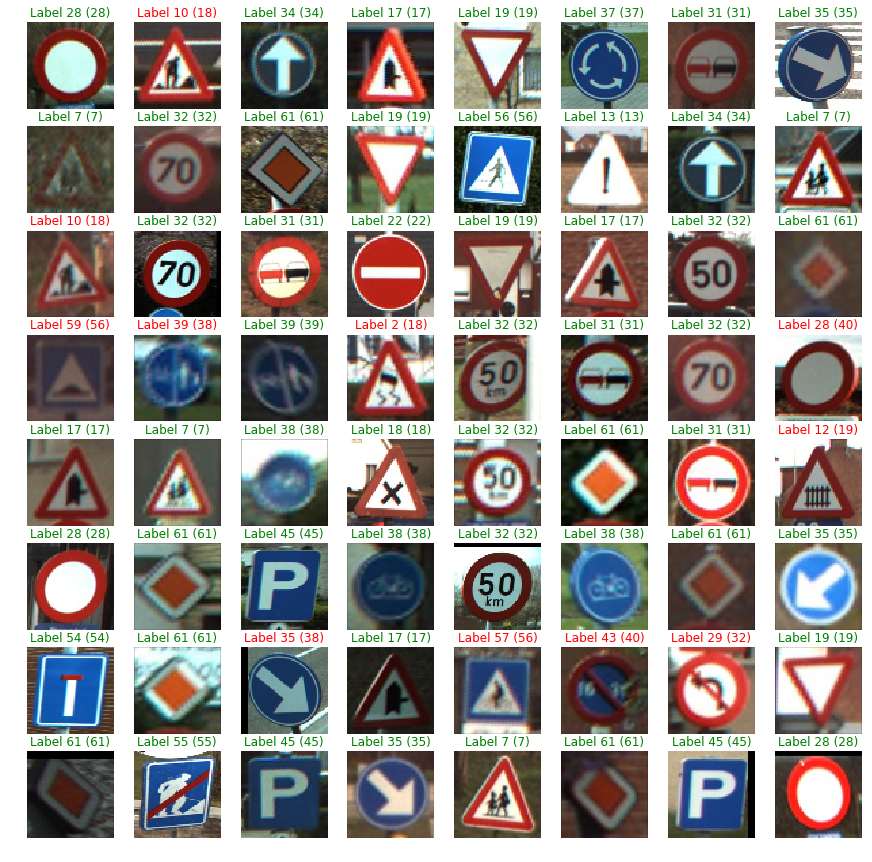

In [194]:
plotSignPredict(X_test,y,y_)